In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=ef5d781c44dd52b97857e021c075023b9a280ae8de52e892ab170ccaea92e184
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
# Antecedents (input variables)
temperature = ctrl.Antecedent(np.arange(0, 101, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')

# Consequents (output variables)
fan_speed = ctrl.Consequent(np.arange(0, 6, 1), 'fan_speed')

In [ ]:
# Temperature membership functions
temperature['low'] = fuzz.trimf(temperature.universe, [0, 0, 50])
temperature['medium'] = fuzz.trimf(temperature.universe, [0, 50, 100])
temperature['high'] = fuzz.trimf(temperature.universe, [50, 100, 100])

# Humidity membership functions

humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [0, 50, 100])
humidity['high'] = fuzz.trimf(humidity.universe, [50, 100, 100])

# Fan speed membership functions
fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 2])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [1, 3, 4])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [2, 4, 5])

In [ ]:
# Fuzzy rules
rule1 = ctrl.Rule(temperature['low'] & humidity['low'], fan_speed['low'])
rule2 = ctrl.Rule(temperature['medium'] & humidity['low'], fan_speed['medium'])
rule3 = ctrl.Rule(temperature['high'] & humidity['low'], fan_speed['high'])
rule4 = ctrl.Rule(temperature['low'] & humidity['medium'], fan_speed['low'])
rule5 = ctrl.Rule(temperature['medium'] & humidity['medium'], fan_speed['medium'])
rule6 = ctrl.Rule(temperature['high'] & humidity['medium'], fan_speed['high'])
rule7 = ctrl.Rule(temperature['low'] & humidity['high'], fan_speed['medium'])
rule8 = ctrl.Rule(temperature['medium'] & humidity['high'], fan_speed['high'])
rule9 = ctrl.Rule(temperature['high'] & humidity['high'], fan_speed['high'])


In [ ]:
# Control system
fan_speed_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

In [ ]:
# Control system simulation
fan_speed_simul = ctrl.ControlSystemSimulation(fan_speed_ctrl)

In [ ]:
# Provide input
fan_speed_simul.input['temperature'] = 37
fan_speed_simul.input['humidity'] = 50

In [ ]:
# Compute output
fan_speed_simul.compute()

In [ ]:
# Extract output
fan_speed_output = fan_speed_s
imul.output['fan_speed']

In [ ]:
print(fan_speed_output)

2.26568765646062


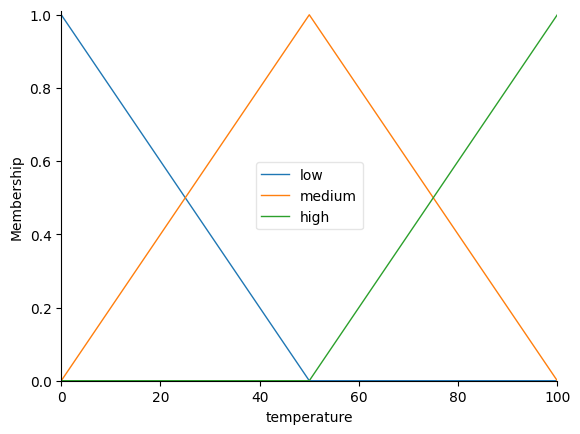

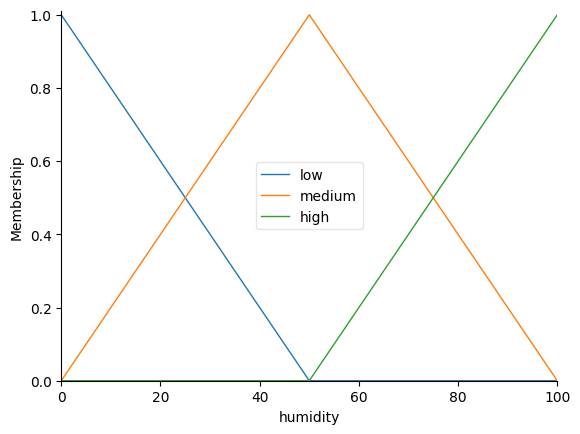

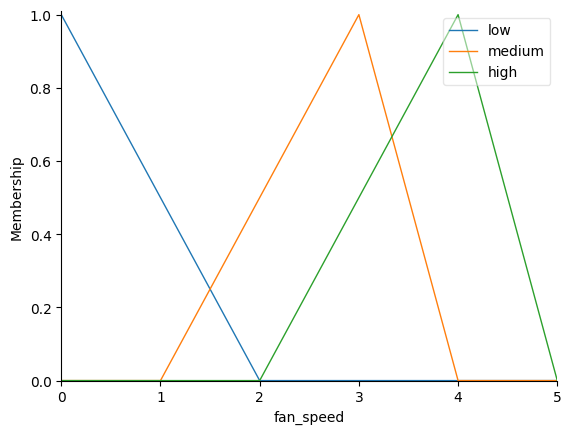

In [ ]:

# Visualizing the fuzzy sets and the fuzzy output
temperature.view()
humidity.view()
fan_speed.view()
